In [3]:
import sys, os, distutils.core
!nvidia-smi

Mon Sep 18 16:51:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   24C    P0    24W / 250W |      0MiB / 12288MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!conda env list

# conda environments:
#
VAdepthENV               /home/013907062/.conda/envs/VAdepthENV
cmpe249               *  /home/013907062/.conda/envs/cmpe249
env_onmttf               /home/013907062/.conda/envs/env_onmttf
koen_base                /home/013907062/.conda/envs/koen_base
newDepth                 /home/013907062/.conda/envs/newDepth
test                     /home/013907062/.conda/envs/test
wmt_infer                /home/013907062/.conda/envs/wmt_infer
base                     /opt/ohpc/pub/apps/anaconda/3.9
stylegan2                /opt/ohpc/pub/apps/anaconda/3.9/envs/stylegan2



In [3]:
!pip list | grep torch

torch                         2.0.1
torchaudio                    2.0.2
torchinfo                     1.8.0
torchvision                   0.15.2


In [ ]:
'''  Installatin
git clone 'https://github.com/facebookresearch/detectron2'
python -m pip install -e detectron2
'''

In [5]:
!nvcc --version

/bin/bash: nvcc: command not found


In [3]:
try:
    import detectron2
    import torch
    import torchvision
    print(f"detectron2 version: {detectron2.__version__}")
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision not available.")

detectron2 version: 0.6
torch version: 2.0.1+cu117
torchvision version: 0.15.2+cu117


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

## Run a pre-trained model with one sample image 

In [8]:
!pwd

/home/013907062/CMPE249/HW1


In [17]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
#cv2.imshow(im)

In [35]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = 'model_final_f10217.pkl'

In [37]:
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
'''
[09/18 19:59:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from 
https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
... model_final_f10217.pkl: 178MB [00:00, 192MB/s]                           
'''
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[09/18 15:44:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from model_final_f10217.pkl ...


/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [38]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.6035, 244.8977, 459.8291, 480.0000],
        [251.1083, 157.8127, 338.9731, 413.6379],
        [114.8496, 268.6864, 148.2352, 398.8111],
        [  0.8217, 281.0327,  78.6072, 478.4210],
        [ 49.3954, 274.1229,  80.1545, 342.9808],
        [561.2248, 271.5816, 596.2755, 385.2552],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9295, 278.3744, 562.2792, 389.3802],
        [335.2409, 251.9167, 414.7491, 275.9375],
        [350.9300, 269.2060, 386.0984, 297.9081],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2656, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8767, 283.3257, 529.9403, 324.0392],
        [594.5663, 283.4820, 609.0577, 311.4124]], device='cuda:0'))


In [42]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2_imshow(out.get_image()[:, :, ::-1])
cv2.imwrite("sample.out.png",out.get_image()[:, :, ::-1])

In [41]:
cv2.imwrite("sample.out.png",out.get_image()[:, :, ::-1])

True

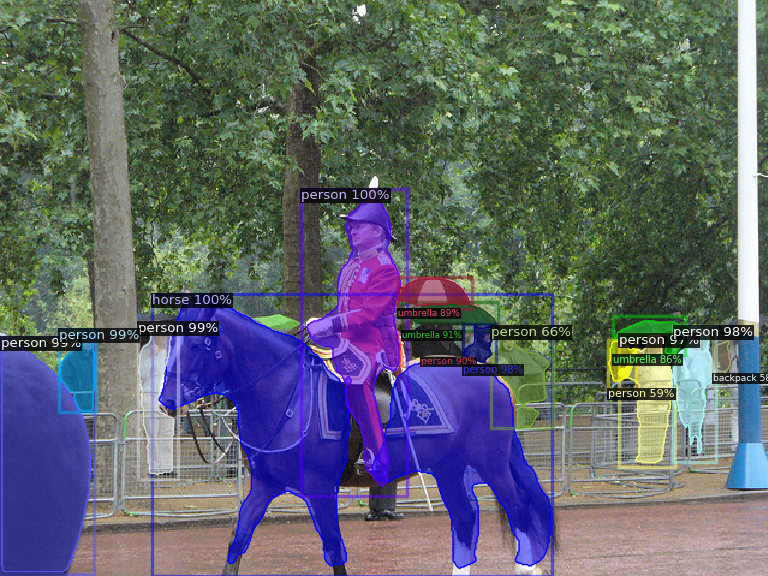

In [44]:
from PIL import Image
# creating a object
im = Image.open("sample.out.png")
im

## Custom Dataset

In [9]:
def get_data_dicts(directory, classes):
    dataset_dicts = []
    for filename in [file for file in os.listdir(directory) if file.endswith('.json')]:
        json_file = os.path.join(directory, filename)
        with open(json_file) as f:
            img_anns = json.load(f)

        record = {}
        
        filename = os.path.join(directory, img_anns["imagePath"])
        height, width = cv2.imread(filename).shape[:2]

        record["file_name"] = filename
        record["height"] = height
        record["width"] = width
      
        annos = img_anns["shapes"]
        objs = []
        for anno in annos:
            px = [a[0] for a in anno['points']] # x coord
            py = [a[1] for a in anno['points']] # y-coord
            poly = [(x, y) for x, y in zip(px, py)] # poly for segmentation
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": classes.index(anno['label']),
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [10]:
classes = ['Vehicle']
data_path = './detectron2/datasets/kitti/'

for d in ["train", "valid"]:
    DatasetCatalog.register("vehicle_" + d, lambda d=d: get_data_dicts(data_path+d, classes))
    MetadataCatalog.get("vehicle_" + d).set(thing_classes=classes)

vehicle_train_metadata = MetadataCatalog.get("vehicle_train")
vehicle_valid_metadata = MetadataCatalog.get("vehicle_valid")

## Retrain

In [4]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.structures import BoxMode

In [6]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("vehicle_train")
cfg.DATASETS.TEST = ("vehicle_valid")
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = 'model_final_f10217.pkl'
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 700
'''
ex) 2000 samples: 500batch*4iters=1epoch
50 samples: 8batch*7iters = 1epoch
'''
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

In [8]:
cfg.OUTPUT_DIR

'./output'

In [9]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[09/18 16:18:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

In [10]:
trainer.train()

[09/18 16:18:27 d2.engine.train_loop]: Starting training from iteration 0


/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/18 16:18:50 d2.utils.events]:  eta: 0:12:06  iter: 19  total_loss: 1.819  loss_cls: 0.7079  loss_box_reg: 0.3487  loss_mask: 0.6869  loss_rpn_cls: 0.0395  loss_rpn_loc: 0.02496    time: 1.0838  last_time: 1.0717  data_time: 0.1273  last_data_time: 0.1216   lr: 7.0289e-06  max_mem: 5376M
[09/18 16:19:11 d2.utils.events]:  eta: 0:11:42  iter: 39  total_loss: 1.713  loss_cls: 0.6128  loss_box_reg: 0.3423  loss_mask: 0.6696  loss_rpn_cls: 0.03805  loss_rpn_loc: 0.02998    time: 1.0712  last_time: 1.0635  data_time: 0.1218  last_data_time: 0.1213   lr: 1.4165e-05  max_mem: 5457M
[09/18 16:19:32 d2.utils.events]:  eta: 0:11:22  iter: 59  total_loss: 1.5  loss_cls: 0.4737  loss_box_reg: 0.3506  loss_mask: 0.6312  loss_rpn_cls: 0.03915  loss_rpn_loc: 0.0262    time: 1.0722  last_time: 1.0520  data_time: 0.1209  last_data_time: 0.1214   lr: 2.13e-05  max_mem: 5457M
[09/18 16:19:54 d2.utils.events]:  eta: 0:11:00  iter: 79  total_loss: 1.335  loss_cls: 0.3515  loss_box_reg: 0.348  loss_mask:

KeyError: "Dataset 'v' is not registered! Available datasets are: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fine_sem_seg_val, cityscapes_fine_instance_seg_test, cityscapes_fine_sem_seg_test, cityscapes_fine_panoptic_train, cityscapes_fine_panoptic_val, voc_2007_trainval, voc_2007_train, voc_2007_val, voc_2007_test, voc_2012_trainval, voc_2012_train, voc_2012_val, ade20k_sem_seg_train, ade20k_sem_seg_val, vehicle_train, vehicle_valid"

## inference

In [11]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("vehicle_valid", )
predictor = DefaultPredictor(cfg)


[09/18 16:53:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [12]:
test_dataset_dicts = get_data_dicts(data_path+"valid/", classes)

len(test_dataset_dicts)
'''

#data_path = './detectron2/datasets/kitti/'
#test_dataset_dicts = get_data_dicts(data_path+"valid", classes)
#test_dataset_dicts = get_data_dicts("./test", classes)

vehicle_train_metadata = MetadataCatalog.get("vehicle_train")
vehicle_valid_metadata = MetadataCatalog.get("vehicle_valid")

'''

'\n\n#data_path = \'./detectron2/datasets/kitti/\'\n#test_dataset_dicts = get_data_dicts(data_path+"valid", classes)\n#test_dataset_dicts = get_data_dicts("./test", classes)\n\nvehicle_train_metadata = MetadataCatalog.get("vehicle_train")\nvehicle_valid_metadata = MetadataCatalog.get("vehicle_valid")\n\n'

In [32]:
!pip list | grep matplotlib

matplotlib                    3.8.0
matplotlib-inline             0.1.6


In [18]:
import matplotlib.pyplot as plt 


./detectron2/datasets/kitti/valid/0000001459.png


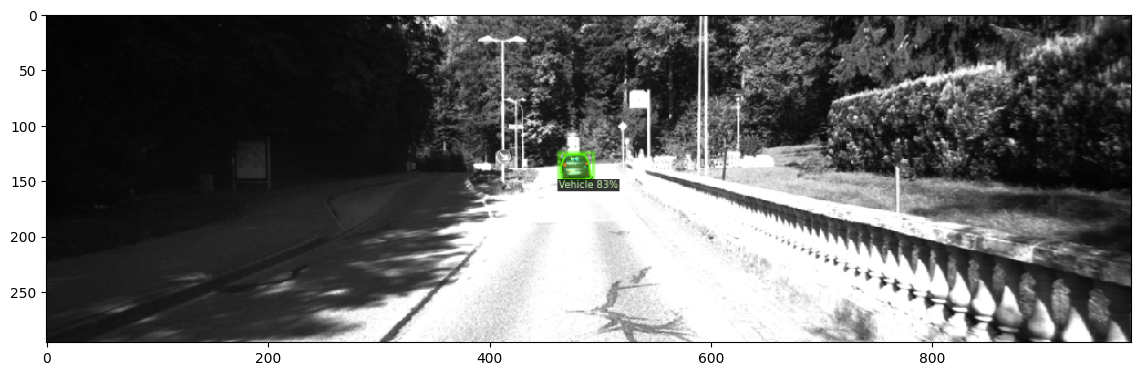

./detectron2/datasets/kitti/valid/0000001558.png


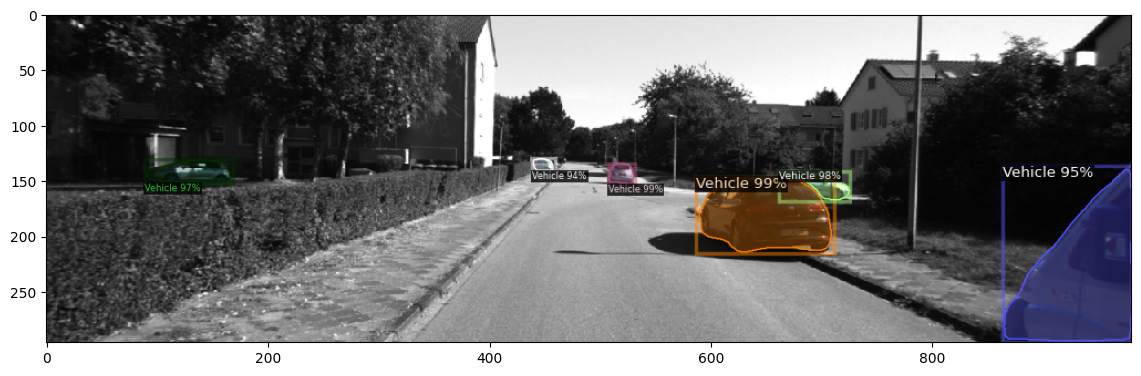

./detectron2/datasets/kitti/valid/0000001385.png


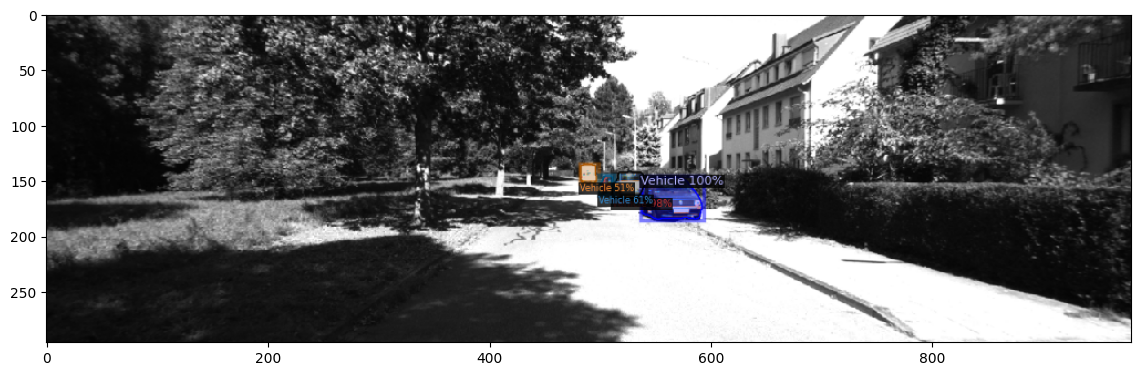

In [20]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(test_dataset_dicts, 3):
    print(d["file_name"])
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1],
                   metadata=vehicle_valid_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW # removes the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [21]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


evaluator = COCOEvaluator("vehicle_valid", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "vehicle_valid")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[09/18 17:01:26 d2.evaluation.coco_evaluation]: Trying to convert 'vehicle_valid' to COCO format ...
[09/18 17:01:26 d2.data.datasets.coco]: Converting annotations of dataset 'vehicle_valid' to COCO format ...)
[09/18 17:01:26 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/18 17:01:26 d2.data.datasets.coco]: Conversion finished, #images: 10, #annotations: 36
[09/18 17:01:26 d2.data.datasets.coco]: Caching COCO format annotations at './output/vehicle_valid_coco_format.json' ...
[09/18 17:01:26 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  Vehicle   | 36           |
|            |              |
[09/18 17:01:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/18 17:01:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedLis

KeyError: 'image_id'